In [1]:
import cartopy.crs as ccrs
import cartopy.feature as feature
import matplotlib.pyplot as plt
import pandas as pd
import folium
from folium import plugins
from folium.plugins import MarkerCluster

# Hidrogeología para la Generación de Energía
## Hidrogeología Ambiental
Creación de gráficos hidrogeoquímicos, muestreo campus UNAL

**Prof. Adriana Piña Fulano**
____
Mapa de puntos de muestreo UNAL

In [3]:
# df = pd.read_excel('../1.Hidrogeoquímica/PuntosMuestreoUNAL.xlsx',sheet_name='PuntosMuestreo')
# df

In [3]:
min_lat, max_lat, min_lon, max_lon = -74.0846, -74.0809, 4.6338, 4.6428
map_ = folium.Map(location=[4.6383,-74.0827] ,zoom_start=16,min_lat=min_lat,max_lat=max_lat,min_lon=min_lon,max_lon=max_lon,
    zoom_control=False,control_scale=True,scrollWheelZoom=True,width=1000,height=600)

marker_cluster = MarkerCluster(name="Estaciones").add_to(map_)

folium.TileLayer("cartodbpositron").add_to(map_)
# folium.TileLayer("Esri.WorldImagery").add_to(map_)
folium.LayerControl().add_to(map_)

minimap = plugins.MiniMap(tile_layer="Esri.WorldImagery",width=300,height=300,zoom_level_offset=-2,)
_ = map_.add_child(minimap)

def plot_station(row):
    html = row.to_frame("_").to_html(classes="table table-striped table-hover table-condensed table-responsive")
    popup = folium.Popup(html, max_width=1000)
    folium.Marker(location=[row.Latitude, row.Longitude], popup=popup).add_to(marker_cluster)

df.apply(plot_station,axis=1)
map_

In [ ]:
mgdf = pd.read_excel('Insumos/CA_SUR.xlsx',sheet_name='Muestreo mgL')

medf = pd.read_excel('PuntosMuestreoUNAL.xlsx',sheet_name='Muestreo meqL')

## Diagrama de Gibbs
El diagrama de Gibbs (1970) relaciona los sólidos disuletos totales como función de la dominanción de $Na^+$ o $Ca^{2+}$ y $Cl^-$ o $HCO_3^-$, ilustrando los procesos de calidad de agua en una cáscara de nuez. A bajas concentraciones disueltas, el agua lluvia sin mucha reacción geoquímica contribuya como iones dominantes son $Na^+$ y $Cl^-$. Cuando entra en contacto con calcita y silicatos de calcio de rápida disolución, el agua aumenta su contenido relativo de $Ca^{2+}$ y $HCO_3^-$. Si hay evaporación concentra la solución, el $Ca^{2+}$ y el $HCO_3^-$ se pierden por precipitación de $CaCO_3$ y la composición del agua cambia hacia arriba en la figura y vuelve a la composición del mar dominada por $Na^-$ y $Cl^-$.


c:\Users\pedro\Desktop\Diplomado\diplomadoenv\Lib\site-packages\wqchartpy\gibbs.py:245: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='upper left', markerscale=1, frameon=False, fontsize=12,
c:\Users\pedro\Desktop\Diplomado\diplomadoenv\Lib\site-packages\wqchartpy\gibbs.py:308: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='upper left', markerscale=1, frameon=False, fontsize=12,


Gibbs plot created. Saving it to c:\Users\pedro\Desktop\Diplomado 



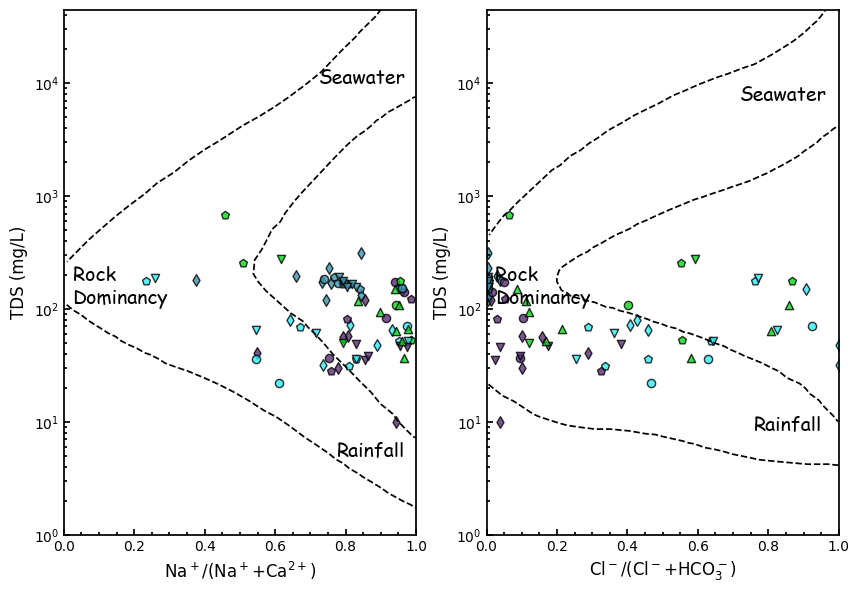

In [11]:
from wqchartpy import gibbs

mgdf['Label'] = ""

gibbs.plot(mgdf, unit='meq/L', figname='Gibbs diagram', figformat='jpg')

Trilinear Piper plot created. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica 



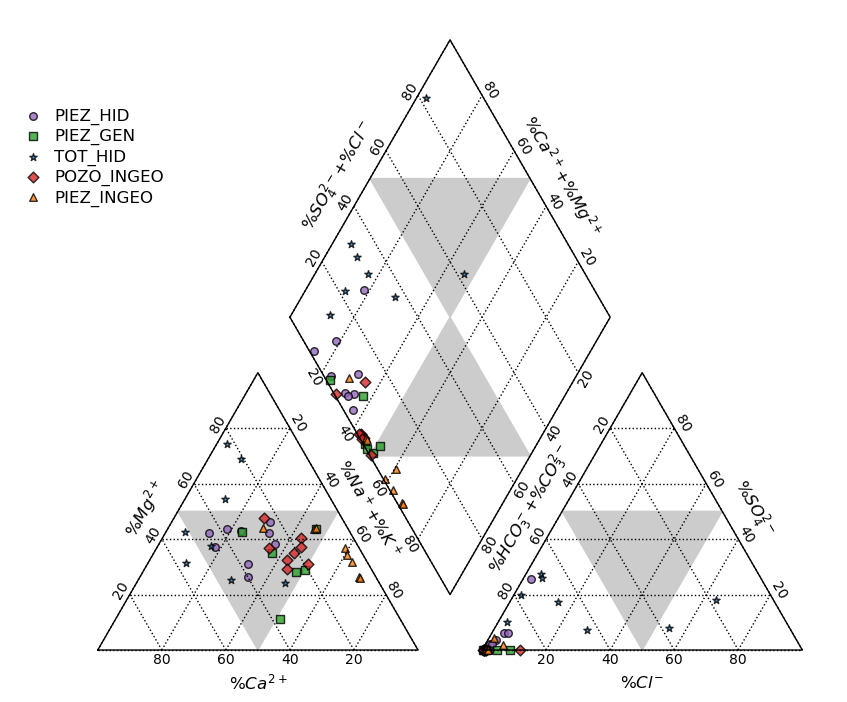

In [6]:
from wqchartpy import triangle_piper
# Guarda el diagrama en con el nombre y el formato especificado
triangle_piper.plot(mgdf, unit='mg/L', figname='triangle Piper diagram', figformat='jpg')

## Diagrama de Piper
El diagram de Piper fue introducido en 1944 y ha sido desde entonces una herramienta fundamental para el análisis hidrogeoquímico para la clasificación del agua, la determinación del potencial de mezcla y la identificaciín de las reacciones químicas que controlan determinado sistema.

Consiste en un diagrama con dos campos tiangulares que representan los aniones ($SO_4^{2+}$ y $Cl^-$) y los cationes ($Ca^{2+}$ y $Mg^{2+}$) por separado y $Na^+ y $K^+$ y la alcalinidad agrupados. Una vez ubicados los cationes y los aniones en cada triángulo, los puntos se proyectan hacia el rombo y donde se intersecte la proyección de los cationes y los aniones. Este punto permite interpretar el tipo de agua.

A continuación se presentan las caracterisiticas químicas del agua subterránea en las diferentes zonas del diagrama de Pipper:

<img src="Fig_Aux/Pipper_expl.JPG" alt="Pipper_expl" style="width:800px;height:500px;">

y los tipos o facies del agua sobre el diagrama:

<img src="Fig_Aux/Pipper_expl_2.JPG" alt="Pipper_expl_2" style="width:500px;height:500px;">

o resumidos en una tabla:

<img src="Fig_Aux/Facies.JPG" alt="Facies" style="width:600px;height:300px;">


Recientemente, algunos autores han propuesto la inclusión de técnicas estadísticas para su construcción y mejora, buscando visualizar información adicional  como las relaciones $Ca^{2+}$/$Mg^{2+}$ vs $Cl^{-}$/$O_4^{2}$, útil para identificar condiciones de intercambio catiónico. 

<img src="Fig_Aux/ILR_Piper.JPG" alt="ILR_Piper" style="width:800px;height:400px;">
Tomado de: Shelton et al., 2018.

Trilinear Piper plot created. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica 



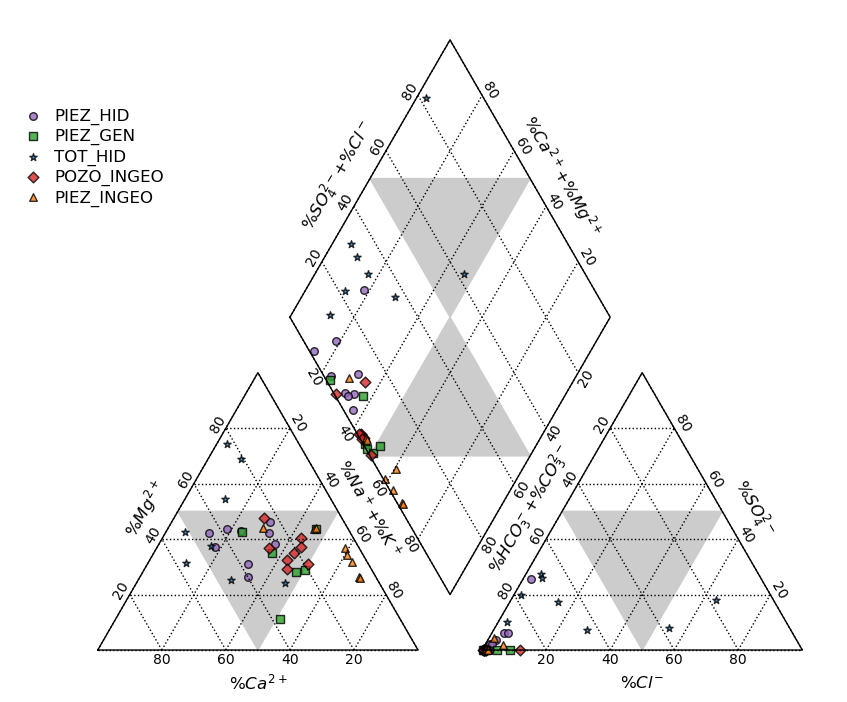

In [7]:
from wqchartpy import triangle_piper

triangle_piper.plot(mgdf, unit='mg/L', figname='triangle Piper diagram', figformat='jpg')

Contour-filed Piper plot created. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica 



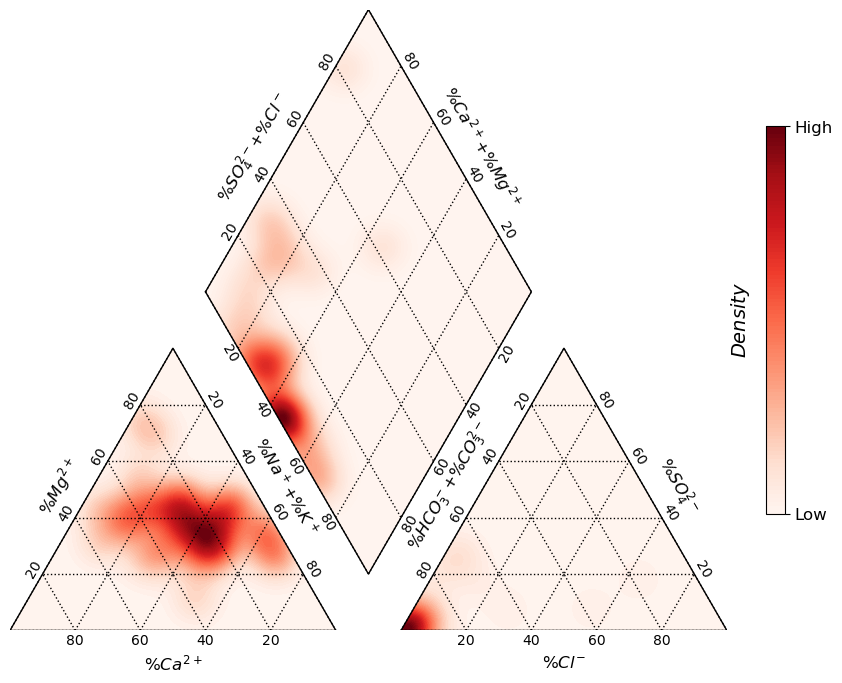

In [8]:
from wqchartpy import contour_piper
contour_piper.plot(mgdf, unit='mg/L',figname='contour-filled Piper diagram', figformat='jpg')

## Diagrama de Durov
Es un digrama tri-linear donde se grafican las concentraciones de los cationes y aniones mayoritarios en meq/L en dos triangulos separados. Las concentrciones en cada triangulo se proyectan sobre el cuadrado central, el cual representa el caracter químico general de la muestra. También es posible graficar otra caracteristica química como los Sólidos Disueltos Totales, el pH, la conductividad, etc.

Durvo diagram created. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica 



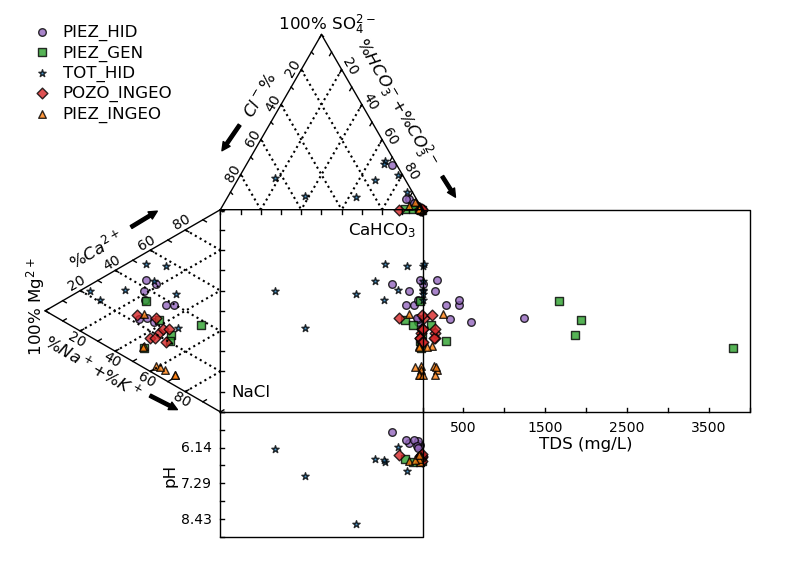

In [9]:
from wqchartpy import durvo

durvo.plot(mgdf, unit='mg/L', figname='Durvo diagram', figformat='jpg')

# HFE-D diagram


HFE-D plot created. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica 



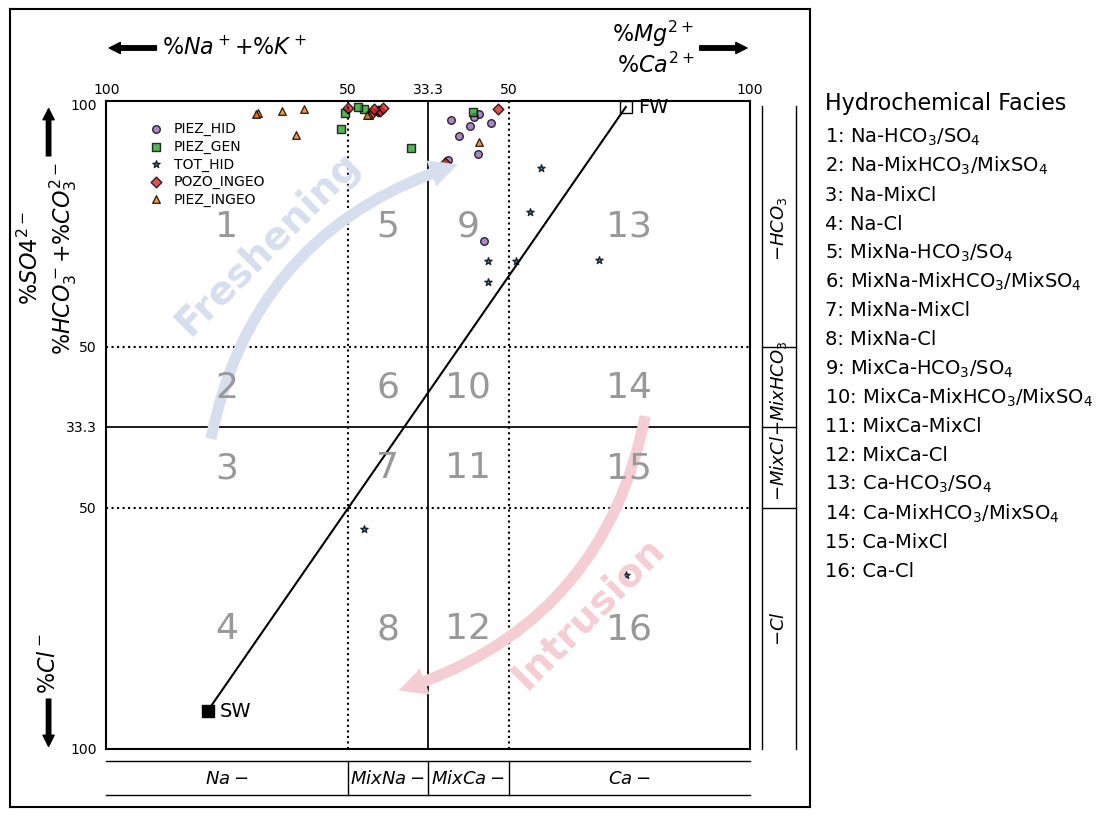

In [10]:
from wqchartpy import hfed

hfed.plot(mgdf, unit='mg/L', figname='HFE-D diagram', figformat='jpg')

# Diagrama de Stiff
En este gráfico, los datos analíticos se grafican en cuatro ejes horizontales paralelos equdistantes uno del otro. Estos diagramas tienen la desventaja que son individuales por muestra. Sin embargo, son de gran utilidad para visualizar las diferencias en la distribución de los aniones y los cationes basado en sus patrones.

Stiff plot created for PIEZ_HID 38035. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica

Stiff plot created for PIEZ_HID 38143. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica

Stiff plot created for PIEZ_HID 38146. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica

Stiff plot created for PIEZ_HID 38158. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica

Stiff plot created for PIEZ_HID 38189. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica

Stiff plot created for PIEZ_HID 38304. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica

Stiff plot created for PIEZ_HID 38531. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica

Stiff plot created for PIEZ_HID 38334. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica



C:\Users\MEGIA\anaconda3\Lib\site-packages\wqchartpy\stiff.py:108: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(3, 3))


Stiff plot created for TOT_HID 38422. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica

Stiff plot created for TOT_HID 38446. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica

Stiff plot created for TOT_HID 38535. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica

Stiff plot created for TOT_HID 38565. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica

Stiff plot created for POZO_INGEO 38033. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica

Stiff plot created for POZO_INGEO 38144. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica

Stiff plot created for POZO_INGEO 38156. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica

Stiff plot created for POZO_INGEO 38186. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquími

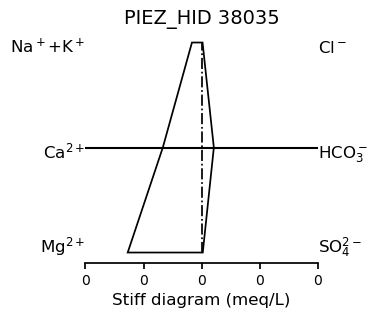

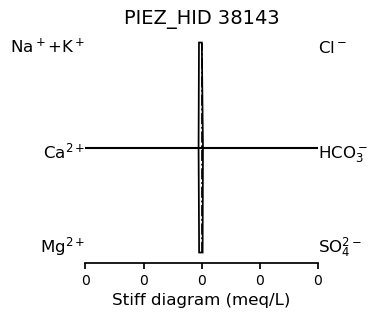

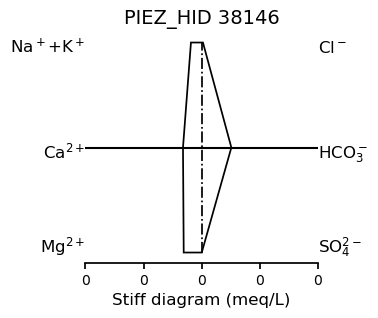

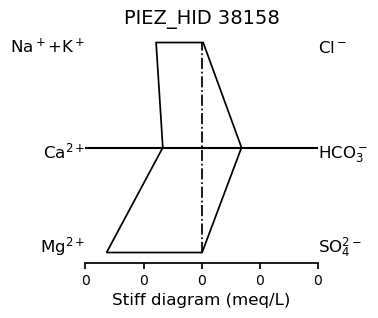

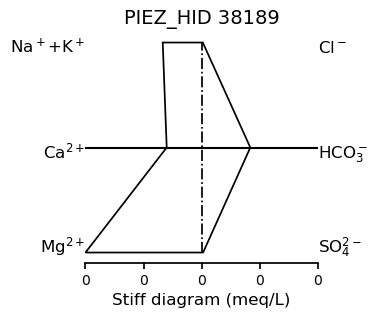

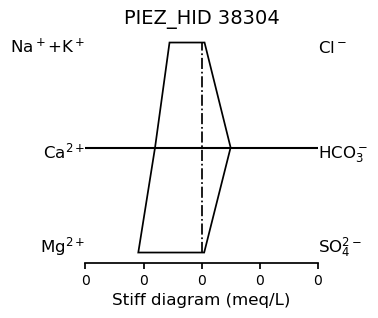

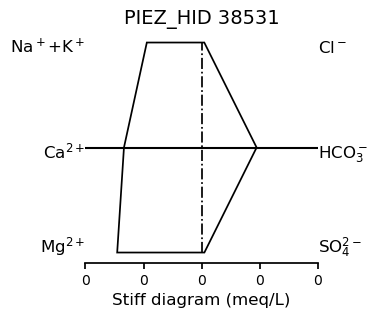

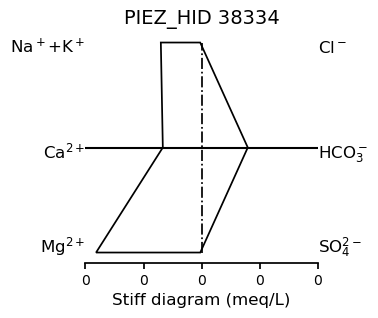

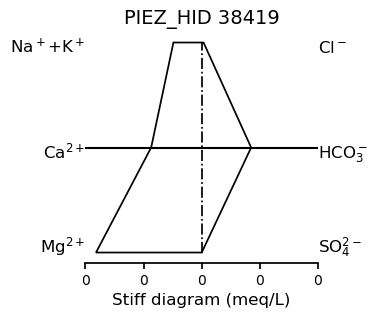

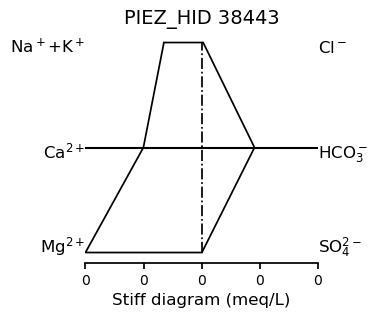

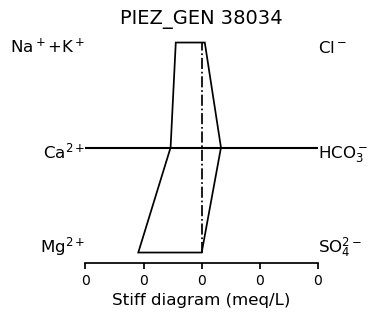

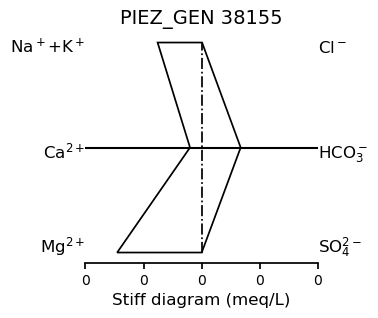

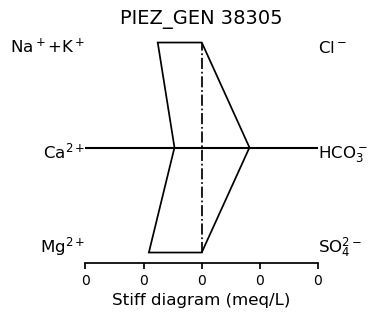

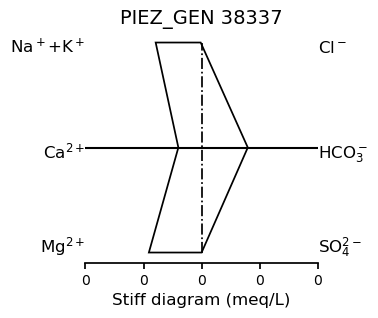

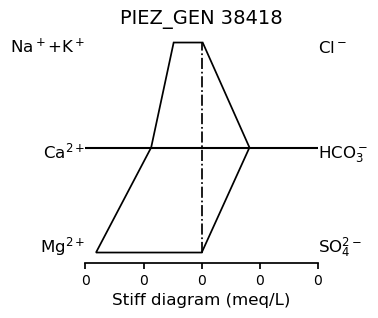

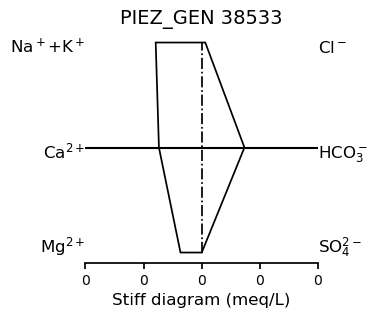

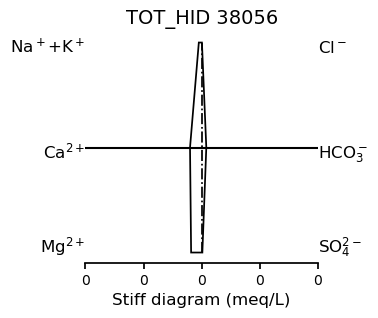

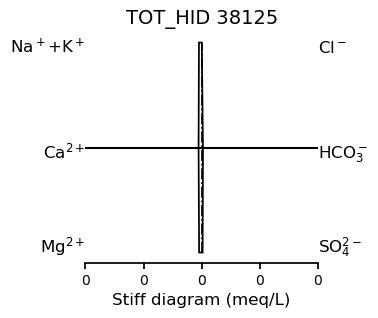

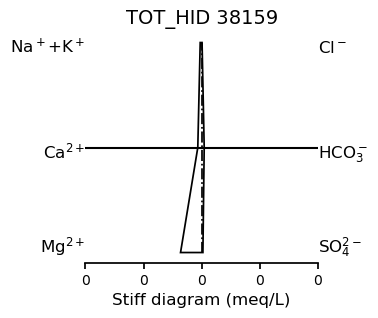

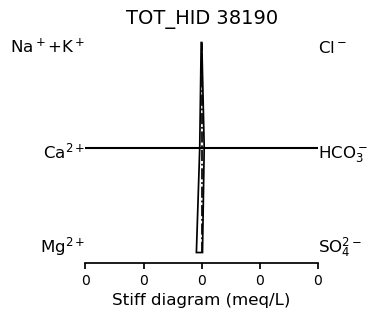

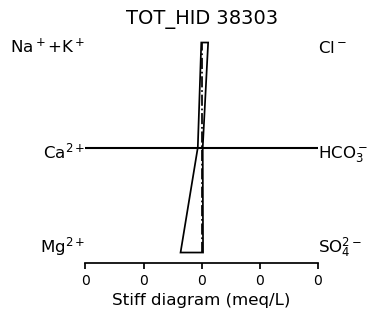

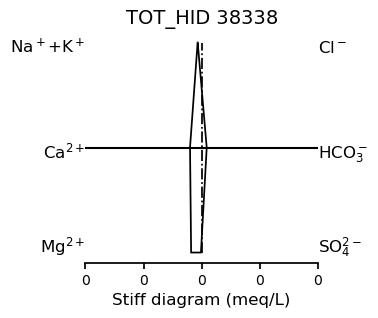

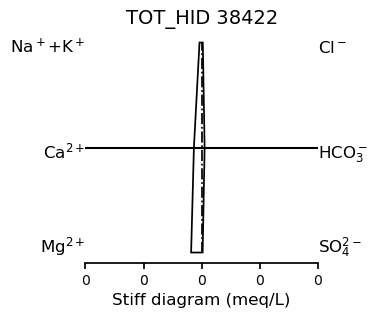

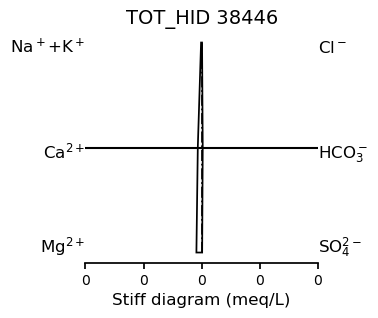

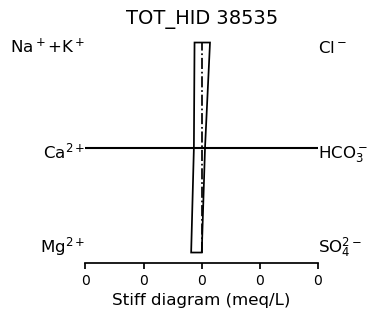

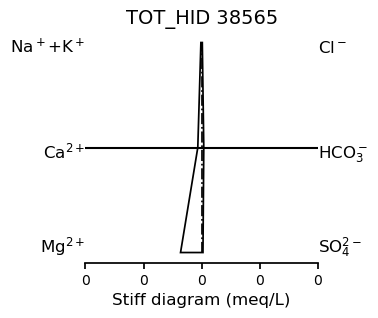

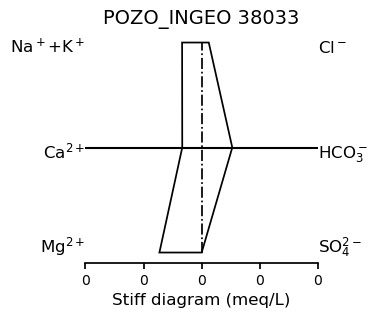

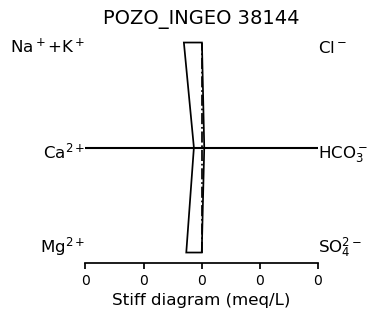

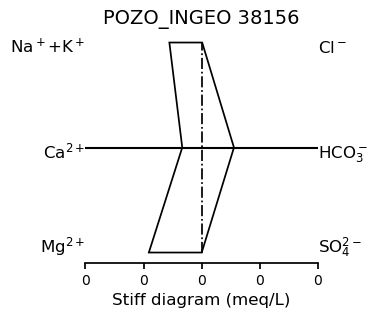

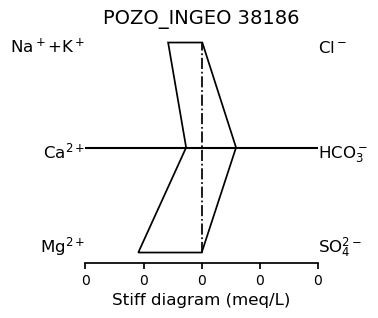

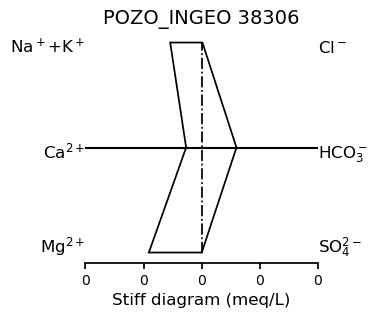

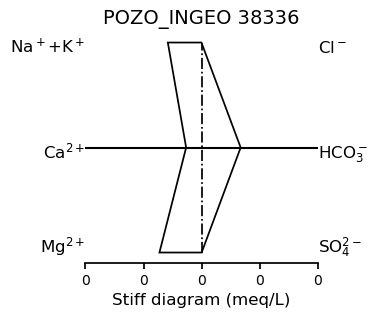

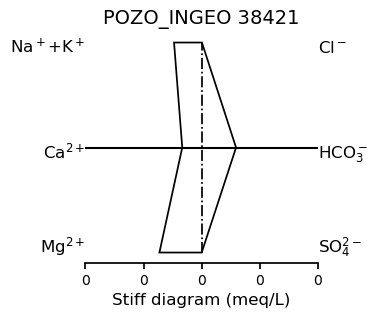

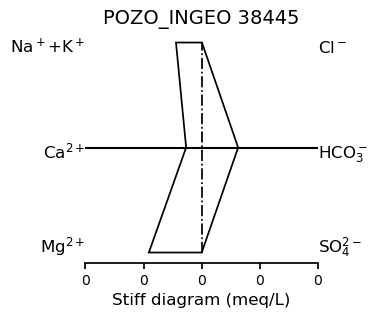

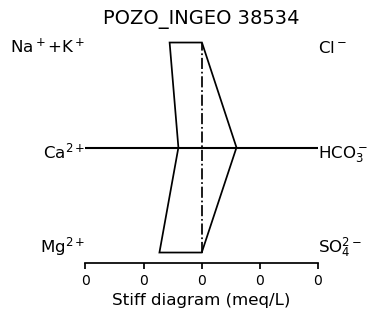

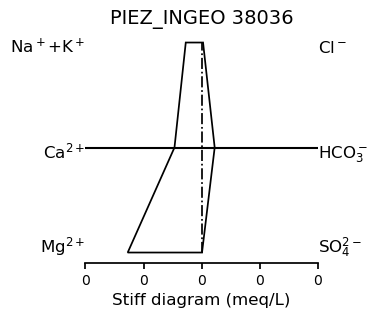

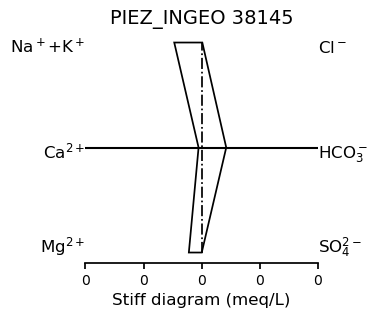

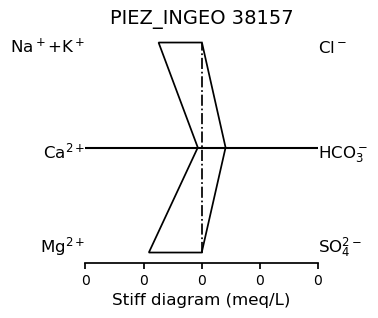

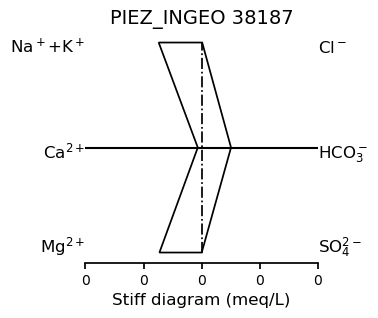

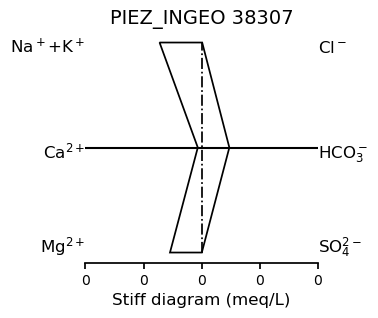

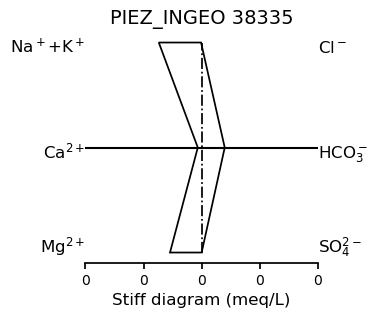

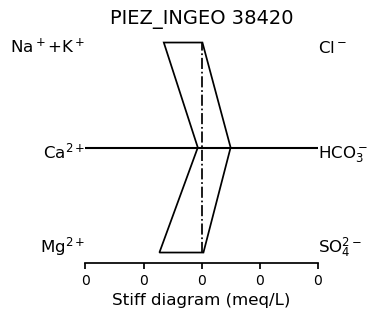

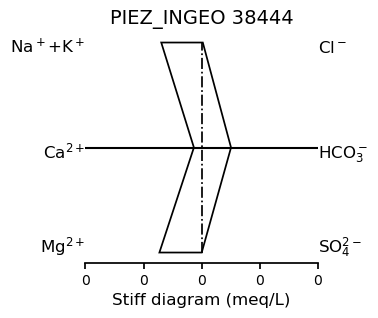

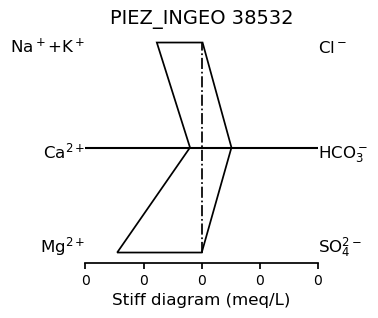

In [11]:
from wqchartpy import stiff
stiff.plot(medf, unit='mg/L', figname='Stiff diagram', figformat='jpg');

# Diagrama de Gaillardet
Grafica la relación $Ca^{2+}$/$Na^{+}$ vs $HCO_3^{-}$/$Na^{+}$ y $Ca^{2+}$/$Na^{+}$ vs $Mg^{2+}$/$Na^{+}$, identificando su relación con rocas evaporitas, silicatos o carbonatos.

Gaillardet plot created. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica 



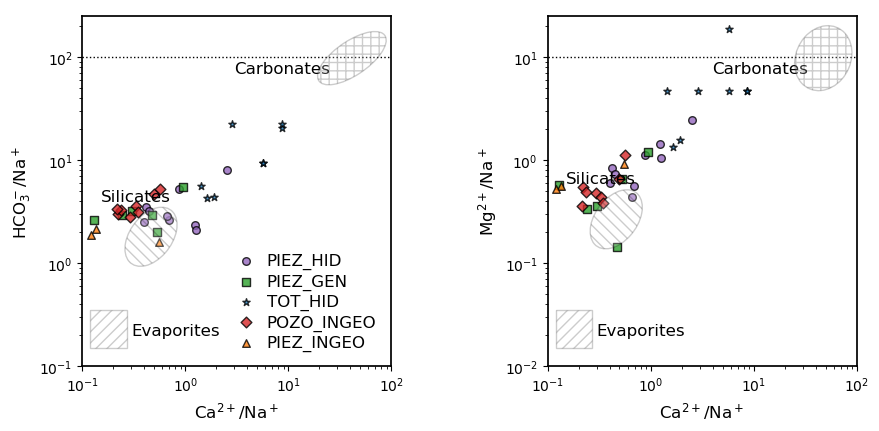

In [12]:
from wqchartpy import gaillardet

gaillardet.plot(mgdf, unit='mg/L', figname='Gaillardet diagram', figformat='jpg')

# Diagrama de Schoeller
Es in grafico en escala semilogaritmica, en donde la abscisa (escala aritmetica) se organizan los iones y cationes a distancias equidistantes. Los puntos son unidos con líneas rectas. Dentro de las ventajas de estos diagramas es que se pueden graficar de manera simulatánea diferentes muestras lo que permite su comparación.


Schoeller diagram created. Saving it to C:\Users\MEGIA\Documents\PEDRO ROMERO\Curso\notebooks\1.Hidrogeoquímica 



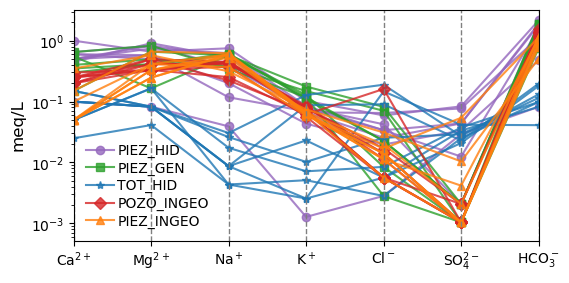

In [ ]:
from wqchartpy import schoeller

schoeller.plot(mgdf, unit='mg/L', figname='Schoeller diagram', figformat='jpg')